### 2021 AQI DATA


In [1]:
import pandas as pd 
air_data= pd.read_csv('2021_aqi.csv')

air_data

,date,zip_code,ReportingArea,StateCode,Latitude,Longitude,OZONEAQI,PM2.5AQI,PM10AQI,CategoryNumber,CategoryName
0,2021-01-01,2045,Weymouth,MA,42.2459,-70.9628,NaN,40.0,NaN,1.0,Good
1,2021-01-02,2045,Weymouth,MA,42.2459,-70.9628,NaN,17.0,NaN,1.0,Good
2,2021-01-03,2045,Weymouth,MA,42.2459,-70.9628,NaN,25.0,NaN,1.0,Good
3,2021-01-04,2045,Weymouth,MA,42.2459,-70.9628,NaN,28.0,NaN,1.0,Good
4,2021-01-05,2045,Weymouth,MA,42.2459,-70.9628,NaN,20.0,NaN,1.0,Good
...,...,...,...,...,...,...,...,...,...,...,...
16395,2021-12-27,2446,Boston,MA,42.3510,-71.0510,13.0,28.0,NaN,1.0,Good
16396,2021-12-28,2446,Boston,MA,42.3510,-71.0510,15.0,42.0,NaN,1.0,Good
16397,2021-12-29,2446,Boston,MA,42.3510,-71.0510,12.0,45.0,NaN,1.0,Good
16398,2021-12-30,2446,Boston,MA,42.3510,-71.0510,3.0,55.0,NaN,1.0,Good


In [2]:
air_data.groupby(['zip_code', 'Latitude', 'Longitude'])

air_data

,date,zip_code,ReportingArea,StateCode,Latitude,Longitude,OZONEAQI,PM2.5AQI,PM10AQI,CategoryNumber,CategoryName
0,2021-01-01,2045,Weymouth,MA,42.2459,-70.9628,NaN,40.0,NaN,1.0,Good
1,2021-01-02,2045,Weymouth,MA,42.2459,-70.9628,NaN,17.0,NaN,1.0,Good
2,2021-01-03,2045,Weymouth,MA,42.2459,-70.9628,NaN,25.0,NaN,1.0,Good
3,2021-01-04,2045,Weymouth,MA,42.2459,-70.9628,NaN,28.0,NaN,1.0,Good
4,2021-01-05,2045,Weymouth,MA,42.2459,-70.9628,NaN,20.0,NaN,1.0,Good
...,...,...,...,...,...,...,...,...,...,...,...
16395,2021-12-27,2446,Boston,MA,42.3510,-71.0510,13.0,28.0,NaN,1.0,Good
16396,2021-12-28,2446,Boston,MA,42.3510,-71.0510,15.0,42.0,NaN,1.0,Good
16397,2021-12-29,2446,Boston,MA,42.3510,-71.0510,12.0,45.0,NaN,1.0,Good
16398,2021-12-30,2446,Boston,MA,42.3510,-71.0510,3.0,55.0,NaN,1.0,Good


In [3]:
unique_zip_codes = air_data['zip_code'].unique()
number_of_unique_zip_codes = len(unique_zip_codes)

print("Number of unique zip codes:", number_of_unique_zip_codes)

Number of unique zip codes: 45


In [4]:
## What is the overall AQI index for Boston based on 2021 AQI data?
from tabulate import tabulate

category = air_data['CategoryName'].value_counts()

category_df = pd.DataFrame({'CategoryName': category.index, 'Count': category.values})

table = tabulate(category_df, headers='keys', tablefmt='fancy_grid')

print(table)

╒════╤════════════════════════════════╤═════════╕
│    │ CategoryName                   │   Count │
╞════╪════════════════════════════════╪═════════╡
│  0 │ Good                           │   15699 │
├────┼────────────────────────────────┼─────────┤
│  1 │ Moderate                       │     625 │
├────┼────────────────────────────────┼─────────┤
│  2 │ Unhealthy for Sensitive Groups │      47 │
╘════╧════════════════════════════════╧═════════╛


###  VISUALS  FOR 2021 AQI DATA
Based on the 2021 AQI data, it appears that most of the zipcodes in Boston(15K out of 16K) had Good AQI levels meaning that overall quality of air in Boston is 'Good' The following visuals below depict the AQI in a consumable manner

In [5]:
## Get the mean PM2.5 AQI values per zip codes --> 45 total

grouped_data = air_data.groupby('zip_code')['PM2.5AQI'].mean().round(2).reset_index()

grouped_data.head()

,zip_code,PM2.5AQI
0,2045,29.02
1,2108,33.37
2,2109,33.37
3,2110,33.37
4,2111,33.37


In [6]:
### VISUAL 1: MAP DEPICTING CLUSTER OF AVERAGE AQI INDEX AROUND BOSTON AREA 
import folium
from folium.plugins import MarkerCluster
from IPython.display import display


grouped_data = grouped_data.dropna(subset=['PM2.5AQI'])

boston_coords = [42.3601, -71.0589]  # Boston's latitude and longitude
m = folium.Map(location=boston_coords, zoom_start=12)


marker_cluster = MarkerCluster().add_to(m)


def get_marker_color(aqi):
    if aqi < 35:
        return 'green'

    
for index, row in grouped_data.iterrows():
    zip_code = row['zip_code']
    aqi = row['PM2.5AQI']
    color = get_marker_color(aqi)
    popup_text = f'<b>AQI:</b> {aqi}'
    folium.CircleMarker(location=boston_coords, radius= 20 , color=color, fill=True, fill_color=color, popup=popup_text).add_to(marker_cluster)

# Create a legend for AQI values
legend_html = """
<div style="position: fixed; bottom: 50px; left: 50px; background-color: white; z-index: 1000; padding: 10px; border: 2px solid grey; font-size: 14px;">
    <p><strong>AQI Legend</strong></p>
    <p>AQI &lt; 35: Green (Good)</p>
</div>
"""


m.get_root().html.add_child(folium.Element(legend_html))

#display(m)

m.save("aqi_cluster_map.html")

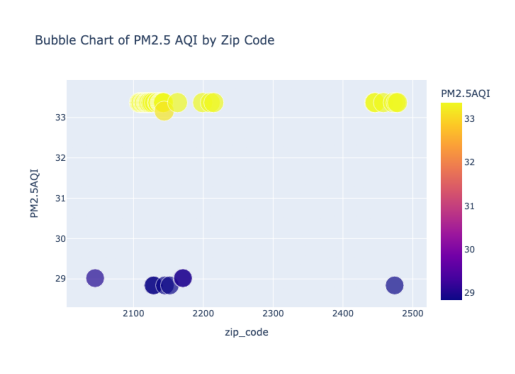

In [7]:
import matplotlib.pyplot as plt
import plotly.express as px

# Assuming you already have 'grouped_data' containing the mean PM2.5 AQI for each zip code
# Filter out rows with NaN values in the 'PM2.5AQI' column
grouped_data = grouped_data.dropna(subset=['PM2.5AQI'])

fig = px.scatter(grouped_data, x='zip_code', y='PM2.5AQI', size='PM2.5AQI', color='PM2.5AQI', title='Bubble Chart of PM2.5 AQI by Zip Code')

# Modify the layout to hide the legend and y-axis labels
fig.update_layout(showlegend=False)
fig.update_yaxes(visible=True)

# Save the chart as a PNG image
fig.write_image("bubble_chart.png")

# Now display the saved PNG image using matplotlib
img = plt.imread("bubble_chart.png")
plt.imshow(img)
plt.axis('off')  # Hide the axis
plt.show()

### TRANSPORT DATA
Now that we have established the overall air quality to be 'Good' for 2021, we can explore transportation data by zipcodes to see how modes of transport can influence daily fluctations in air quality.

In [8]:
### cleaned census data for transportation #### 

census_transport = pd.read_csv('census_transport.csv')

census_transport.head()

,Zipcode,Estimated_Civilian_Noninstitutionalized_Population,Estimated_Civilian_Noninstitutionalized_Population_with_Health_Coverage,Estimated_Civilian_Noninstitutionalized_Population_No_Health_Coverage,Percent_Civilian_Noninstitutionalized_Population_with_Health_Coverage,Percent_Civilian_Noninstitutionalized_Population_No_Health_Coverage,Estimated_Total_Population_Commuting_to_Work_16_years_and_over,"Estimated_Total_Population_Commuting_to_Work_16_years_and_over_Car, truck, or van -- drove alone","Estimated_Total_Population_Commuting_to_Work_16_years_and_over_Car, truck, or van -- carpooled",Estimated_Total_Population_Commuting_to_Work_16_years_and_over_Public transportation (excluding taxicab),...,"Percent_Total_Households_Income_and_Benefits_Less than $10,000","Percent_Total_Households_Income_and_Benefits_$10,000 to $14,999","Percent_Total_Households_Income_and_Benefits_$15,000 to $24,999","Percent_Total_Households_Income_and_Benefits_$25,000 to $34,999","Percent_Total_Households_Income_and_Benefits_$35,000 to $49,999","Percent_Total_Households_Income_and_Benefits_$50,000 to $74,999","Percent_Total_Households_Income_and_Benefits_$75,000 to $99,999","Percent_Total_Households_Income_and_Benefits_$100,000 to $149,999","Percent_Total_Households_Income_and_Benefits_$150,000 to $199,999","Percent_Total_Households_Income_and_Benefits_$200,000 or more"
0,2045,10120,9957,163,98.4,1.6,6055,4369,336,462,...,3.7,1.1,4.3,4.7,5.8,12.8,10.0,24.6,9.5,23.3
1,2108,4195,4128,67,98.4,1.6,2081,190,40,389,...,5.0,7.7,0.6,2.8,2.7,10.8,4.8,14.8,11.8,39.1
2,2109,3508,3460,48,98.6,1.4,2605,383,10,402,...,2.4,2.1,4.0,2.1,2.0,10.5,7.4,18.5,18.8,32.2
3,2110,2307,2289,18,99.2,0.8,1154,294,18,138,...,10.9,2.7,3.4,4.8,1.2,10.5,4.4,14.6,5.7,42.0
4,2111,7841,7723,118,98.5,1.5,3715,514,84,578,...,15.8,7.5,7.6,6.1,8.7,8.8,6.3,8.3,5.3,25.7


In [9]:
### Total number of Boston residents across 45 zip codes transport mediums: 
total_work = census_transport['Estimated_Total_Population_Commuting_to_Work_16_years_and_over'].mean()
total_work

12630.631578947368

So this means, an avergae of 12.6K residents that are 16 years or older using some form to public transport to work on a daily basis

In [10]:
### Further exploring each of the modes of transportation##

car_carpool = census_transport['Percent_Total_Population_Commuting_to_Work_16_years_and_over_Car, truck, or van -- carpooled'].mean()
car = census_transport['Percent_Total_Population_Commuting_to_Work_16_years_and_over_Car, truck, or van -- drove alone'].mean()

car_total = car_carpool + car
car_totals = car_total/2

car_totals

17.43289473684211

Aprrox. 17% residents across the 45 zip codes in Boston area commute to work using a car(either driving alone or car pooling) 

In [11]:
public_transport = census_transport['Percent_Total_Population_Commuting_to_Work_16_years_and_over_Public transportation (excluding taxicab)'].mean()
public_transport

23.46052631578947

Aprrox. 23% residents across the 45 zip codes in Boston area commute to work using a medium of public transport(train. commuter rail, bus, ferry) 

In [12]:
### WALK #####
walked = census_transport['Percent_Total_Population_Commuting_to_Work_16_years_and_over_Walked'].mean()
walked

22.376315789473686

Aprrox. 22% residents across the 45 zip codes in Boston area walk to their place of work(maybe close in proximity to place of work --> can be explored further) 

In [13]:
### WORKED FROM HOME #####
home_work = census_transport['Percent_Total_Population_Commuting_to_Work_16_years_and_over_Worked from home'].mean()
home_work

14.510526315789473

Aprrox. 15% residents across the 45 zip codes in Boston area work remotely and don't use any mode of transportation.

In [14]:
## TO SUMMARIZE: Across all 45 zip codes in Boston, 16+ years fall into the following modes of transport:

other = census_transport['Percent_Total_Population_Commuting_to_Work_16_years_and_over_Other means'].mean()
car_total = car_carpool + car

# Round the percentages to two decimal places
car_total = round(car_total, 2)
public_transport = round(public_transport, 2)
walked = round(walked, 2)
home_work = round(home_work, 2)
other = round(other, 2)

# Create a dictionary with the data
data = {
    'Means of Commuting': ['Car', 'Public Transport', 'Walk', 'Worked from Home', 'Other'],
    'Average Percentage': [car_total, public_transport, walked, home_work, other]
}

# Create a DataFrame from the dictionary
commuting_df = pd.DataFrame(data)

# Convert the DataFrame to a tabular format
table = tabulate(commuting_df, headers='keys', tablefmt='fancy_grid')


print(table)

╒════╤══════════════════════╤══════════════════════╕
│    │ Means of Commuting   │   Average Percentage │
╞════╪══════════════════════╪══════════════════════╡
│  0 │ Car                  │                34.87 │
├────┼──────────────────────┼──────────────────────┤
│  1 │ Public Transport     │                23.46 │
├────┼──────────────────────┼──────────────────────┤
│  2 │ Walk                 │                22.38 │
├────┼──────────────────────┼──────────────────────┤
│  3 │ Worked from Home     │                14.51 │
├────┼──────────────────────┼──────────────────────┤
│  4 │ Other                │                 4.77 │
╘════╧══════════════════════╧══════════════════════╛


### VISUALS FOR TRANSPORT DATA
Lets expand these overall trends to understand the most common mode of transport per zip code(note graph split into 2 parts for readablity):

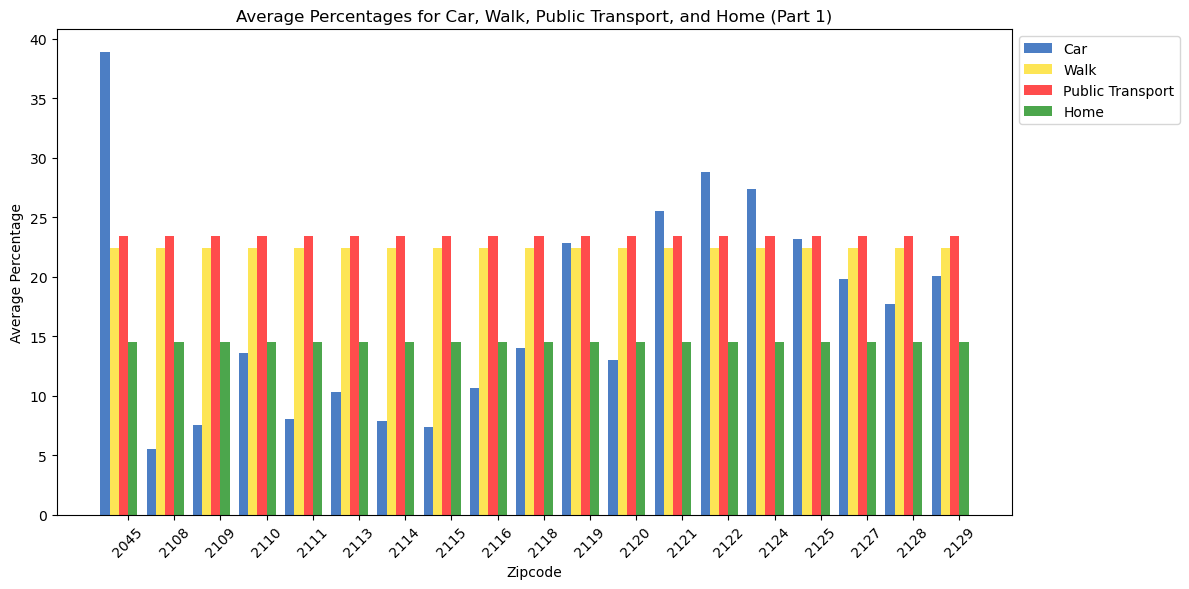

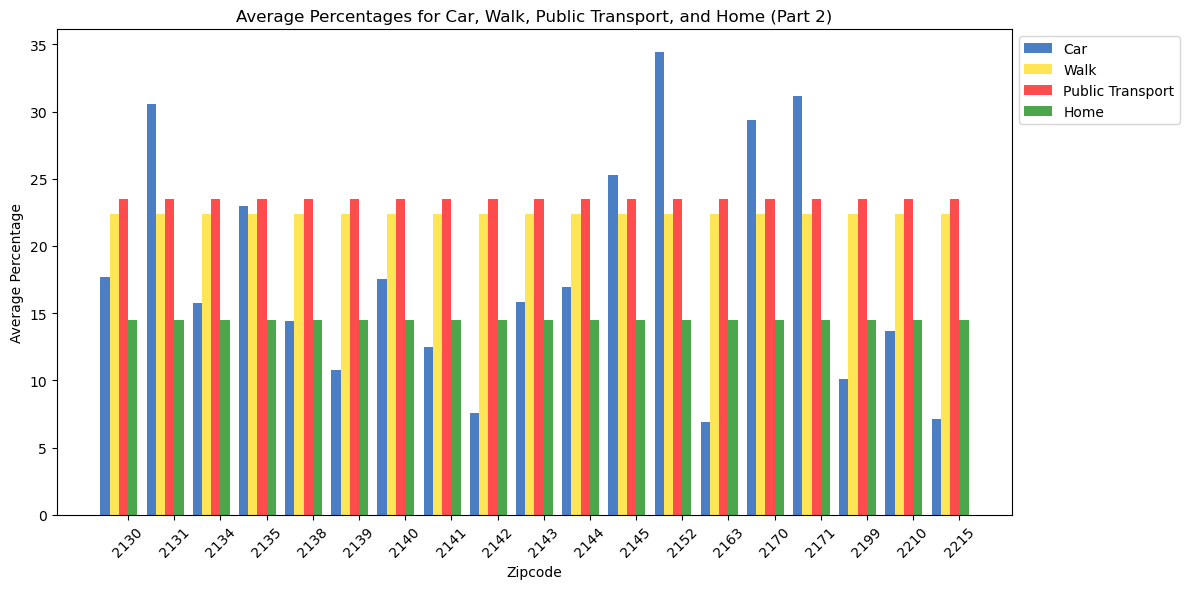

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the average percentages for car, walk, public transport, and home for each zipcode
census_transport['Average_Car'] = (census_transport['Percent_Total_Population_Commuting_to_Work_16_years_and_over_Car, truck, or van -- drove alone'] +
                                   census_transport['Percent_Total_Population_Commuting_to_Work_16_years_and_over_Car, truck, or van -- carpooled']) / 2
census_transport['Average_Walk'] = census_transport['Percent_Total_Population_Commuting_to_Work_16_years_and_over_Walked'].mean()
census_transport['Average_Public_Transport'] = census_transport['Percent_Total_Population_Commuting_to_Work_16_years_and_over_Public transportation (excluding taxicab)'].mean()
census_transport['Average_Home'] = census_transport['Percent_Total_Population_Commuting_to_Work_16_years_and_over_Worked from home'].mean()

# Create an array for x-positions
x = np.arange(len(census_transport['Zipcode']))

# Set the bar width
bar_width = 0.2

# Define the gap between zipcodes
gap = 0.2

# Define the number of zipcodes to split into two graphs (e.g., half the zipcodes in each)
split_index = len(x) // 2


custom_colors = ['#0047AB', '#FDDA0D', 'red', 'green']


# Create the first grouped bar chart
plt.figure(figsize=(12, 6))
car_bars = plt.bar(x[:split_index] - 1.5 * bar_width - gap, census_transport['Average_Car'][:split_index], width=bar_width, label='Car', alpha=0.7, color = custom_colors[0])
walk_bars = plt.bar(x[:split_index] - 0.5 * bar_width - gap, census_transport['Average_Walk'][:split_index], width=bar_width, label='Walk', alpha=0.7, color = custom_colors[1])
pt_bars = plt.bar(x[:split_index] + 0.5 * bar_width - gap, census_transport['Average_Public_Transport'][:split_index], width=bar_width, label='Public Transport', alpha=0.7, color = custom_colors[2])
home_bars = plt.bar(x[:split_index] + 1.5 * bar_width - gap, census_transport['Average_Home'][:split_index], width=bar_width, label='Home', alpha=0.7, color = custom_colors[3])

plt.xlabel('Zipcode')
plt.ylabel('Average Percentage')
plt.title('Average Percentages for Car, Walk, Public Transport, and Home (Part 1)')

# Adjust the x-axis ticks and labels
plt.xticks(x[:split_index], census_transport['Zipcode'][:split_index], rotation=45)

# Place the legend outside the graph
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

# Create the second grouped bar chart
plt.figure(figsize=(12, 6))
car_bars = plt.bar(x[split_index:] - 1.5 * bar_width - gap, census_transport['Average_Car'][split_index:], width=bar_width, label='Car', alpha=0.7, color = custom_colors[0])
walk_bars = plt.bar(x[split_index:] - 0.5 * bar_width - gap, census_transport['Average_Walk'][split_index:], width=bar_width, label='Walk', alpha=0.7, color = custom_colors[1])
pt_bars = plt.bar(x[split_index:] + 0.5 * bar_width - gap, census_transport['Average_Public_Transport'][split_index:], width=bar_width, label='Public Transport', alpha=0.7, color = custom_colors[2])
home_bars = plt.bar(x[split_index:] + 1.5 * bar_width - gap, census_transport['Average_Home'][split_index:], width=bar_width, label='Home', alpha=0.7, color = custom_colors[3])

plt.xlabel('Zipcode')
plt.ylabel('Average Percentage')
plt.title('Average Percentages for Car, Walk, Public Transport, and Home (Part 2)')

# Adjust the x-axis ticks and labels
plt.xticks(x[split_index:], census_transport['Zipcode'][split_index:], rotation=45)

# Place the legend outside the graph
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

Based on the grouped bar graphs above, we see that Car seems to be the most popular medium of transport, followed by public transport. What can be further studied is the impact this can have on air quality and how Boston combats this since the air quality for 3032 is relatively 'Good'

### PPI DATA
Next, lets explore PPI Data Trends to measure how proximity to roads impact residents of Boston, especially different racial groups disproportionately. 

In [16]:
ppi_df  = pd.read_csv('ppi.csv')

ppi_df

,objectid,g250m_id,commtypid,commtype,nhwhi_10,nhaa_10,nhapi_10,lat_10,nhoth_10,ppi5,shape
0,1,144054.0,3,Maturing Suburbs,26.88,0.37,3.03,0.37,1.04,2,3C00000005000000080010006A69000020000000011000...
1,2,115030.0,3,Maturing Suburbs,33.00,0.00,14.59,0.31,2.10,1,3C00000005000000080010006A69000020000000011000...
2,3,232476.0,4,Developing Suburbs,2.66,0.00,0.00,0.00,0.00,4,3C00000005000000080010006A69000020000000011000...
3,4,112471.0,4,Developing Suburbs,1.34,0.00,0.04,0.02,0.00,0,3C00000005000000080010006A69000020000000011000...
4,5,148255.0,1,Inner Core,0.00,0.00,0.00,0.00,0.00,0,0C01000028000000080010006A690000B0030000011000...
...,...,...,...,...,...,...,...,...,...,...,...
62171,62172,70856.0,3,Maturing Suburbs,3.25,0.00,0.00,0.00,0.00,4,3C00000005000000080010006A69000020070000011000...
62172,62173,85868.0,3,Maturing Suburbs,0.00,0.00,0.00,0.00,0.00,0,4200000006000000080010006A69000026070000011000...
62173,62174,73413.0,2,Regional Urban Centers,107.08,1.19,3.08,1.81,5.06,0,3C00000005000000080010006A69000020070000011000...
62174,62175,88437.0,3,Maturing Suburbs,4.23,0.00,0.17,0.09,0.02,0,790000000F000000080010006A6900009D010000011000...


In [17]:
### PPI Average Densities for Category 0 

ppi_df.dropna(inplace=True)
ppi_df0 = ppi_df[ppi_df['ppi5'] == 0]
ppi_df0_avg = ppi_df0[['nhwhi_10', 'nhaa_10', 'nhapi_10', 'lat_10', 'nhoth_10']].mean()
ppi_df0_std = ppi_df0[['nhwhi_10', 'nhaa_10', 'nhapi_10', 'lat_10', 'nhoth_10']].std()
print(ppi_df0_avg.head())


nhwhi_10    12.783550
nhaa_10      0.516185
nhapi_10     0.780224
lat_10       0.507531
nhoth_10     0.289226
dtype: float64


In [18]:
### PPI Average Densities for Category 1
ppi_df1 = ppi_df[ppi_df['ppi5'] == 1]
ppi_df1_avg = ppi_df1[['nhwhi_10', 'nhaa_10', 'nhapi_10', 'lat_10', 'nhoth_10']].mean()
ppi_df1_std = ppi_df1[['nhwhi_10', 'nhaa_10', 'nhapi_10', 'lat_10', 'nhoth_10']].std()
print(ppi_df1_avg.head())


nhwhi_10    24.379456
nhaa_10      1.080559
nhapi_10     1.518334
lat_10       1.197523
nhoth_10     0.612091
dtype: float64


In [19]:
### PPI Average Densities for Category 2
ppi_df2 = ppi_df[ppi_df['ppi5'] == 2]
ppi_df2_avg = ppi_df2[['nhwhi_10', 'nhaa_10', 'nhapi_10', 'lat_10', 'nhoth_10']].mean()
ppi_df2_std = ppi_df2[['nhwhi_10', 'nhaa_10', 'nhapi_10', 'lat_10', 'nhoth_10']].std()
print(ppi_df2_avg.head())


nhwhi_10    34.607915
nhaa_10      2.041301
nhapi_10     2.345419
lat_10       1.854871
nhoth_10     0.950391
dtype: float64


In [20]:
### PPI Average Densities for Category 3
ppi_df3 = ppi_df[ppi_df['ppi5'] == 3]
ppi_df3_avg = ppi_df3[['nhwhi_10', 'nhaa_10', 'nhapi_10', 'lat_10', 'nhoth_10']].mean()
ppi_df3_std = ppi_df3[['nhwhi_10', 'nhaa_10', 'nhapi_10', 'lat_10', 'nhoth_10']].std()
print(ppi_df3_avg.head())

nhwhi_10    46.888427
nhaa_10      3.960835
nhapi_10     3.413472
lat_10       3.451681
nhoth_10     1.699663
dtype: float64


In [21]:
### PPI Average Densities for Category 4
ppi_df4 = ppi_df[ppi_df['ppi5'] == 4]
ppi_df4_avg = ppi_df4[['nhwhi_10', 'nhaa_10', 'nhapi_10', 'lat_10', 'nhoth_10']].mean()
ppi_df4_std = ppi_df4[['nhwhi_10', 'nhaa_10', 'nhapi_10', 'lat_10', 'nhoth_10']].std()
print(ppi_df4_avg.head())

nhwhi_10    72.887019
nhaa_10      9.893672
nhapi_10     7.263983
lat_10       9.668967
nhoth_10     3.697175
dtype: float64


In [22]:
### PPI Average Densities for Category 5
ppi_df5 = ppi_df[ppi_df['ppi5'] == 5]
ppi_df5_avg = ppi_df5[['nhwhi_10', 'nhaa_10', 'nhapi_10', 'lat_10', 'nhoth_10']].mean()
ppi_df5_std = ppi_df5[['nhwhi_10', 'nhaa_10', 'nhapi_10', 'lat_10', 'nhoth_10']].std()
print(ppi_df5_avg.head())

nhwhi_10    89.178365
nhaa_10     15.449001
nhapi_10    15.333186
lat_10      21.452750
nhoth_10     5.590272
dtype: float64


### VISUALS FOR PPI DATA

Next Steps: 
1. Have census data that contains details about household sizes, and average income. Need to conduct EDA 

2. Now that the basic trends have been established, what can be concluded about the yearly changes in Boston's AQI and the health impacts?

In [23]:
ppi_new = ppi_df['ppi5'].value_counts()
#ppi_new = ppi_new.sort_values(ascending=True)
ppi = sum(ppi_new)
ppi

62176

In [24]:
ppi_new

0    25571
5     7342
4     7340
3     7335
2     7326
1     7262
Name: ppi5, dtype: int64

In [25]:
ppi0 = 25571/ppi

pp11=7262/ppi

ppi2 = 7326/ppi 

ppi3 = 7335/ppi

ppi4 = 7340/ppi

ppi5 = 7342/ppi 

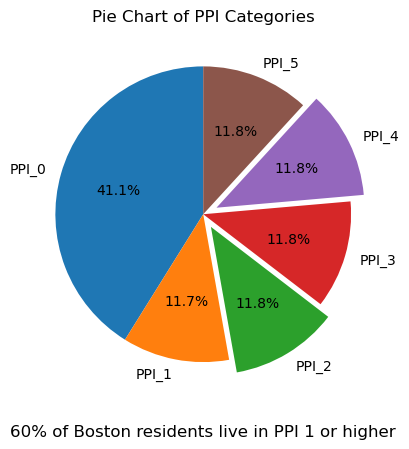

In [26]:
import matplotlib.pyplot as plt

x = [25571, 7262, 7326, 7335, 7340, 7342]
labels = ['PPI_0', 'PPI_1', 'PPI_2', 'PPI_3', 'PPI_4', 'PPI_5']
explode = (0, 0, 0.1, 0, 0.1, 0)

# Create a pie chart with percentages displayed inside each slice
plt.pie(x, labels=labels, explode=explode, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Pie Chart of PPI Categories')

# Add a label
plt.text(0, -1.5, '60% of Boston residents live in PPI 1 or higher', ha='center', fontsize=12)

plt.show()


Version 1 and 2 for PPI and RACIAL GROUPS

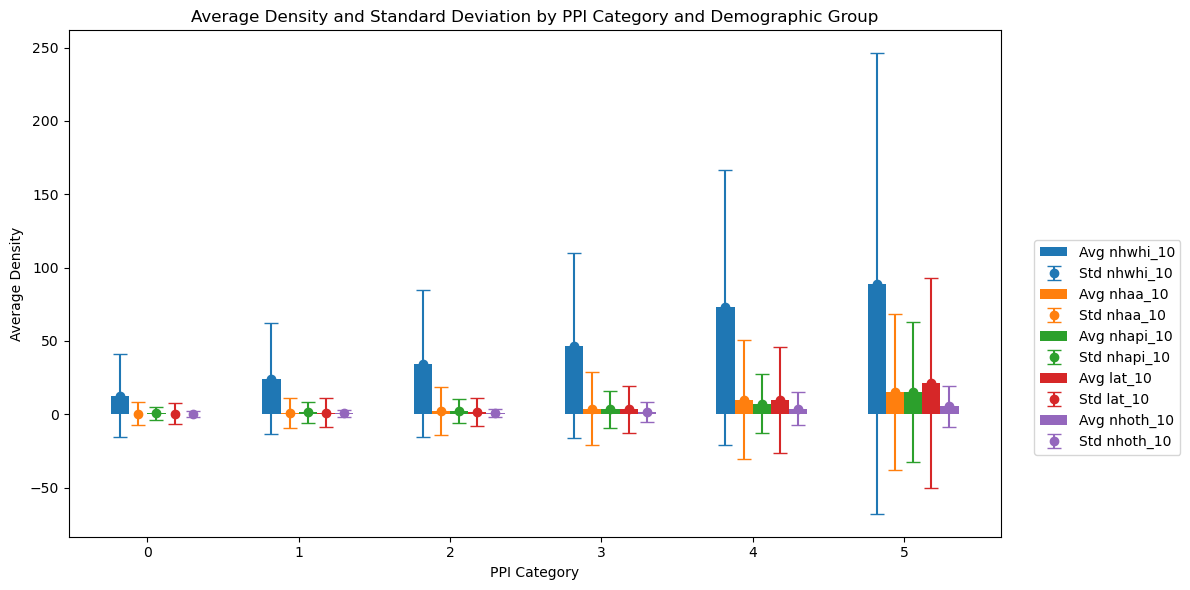

In [27]:
import matplotlib.pyplot as plt

# Define demographic groups
demographic_groups = ['nhwhi_10', 'nhaa_10', 'nhapi_10', 'lat_10', 'nhoth_10']

# Data for each 'ppi5' category
ppi_categories = ['0', '1', '2', '3', '4', '5']
ppi_avgs = [ppi_df0_avg, ppi_df1_avg, ppi_df2_avg, ppi_df3_avg, ppi_df4_avg, ppi_df5_avg]
ppi_stds = [ppi_df0_std, ppi_df1_std, ppi_df2_std, ppi_df3_std, ppi_df4_std, ppi_df5_std]

# Create a bar chart for each demographic group
fig, ax = plt.subplots(figsize=(12, 6))
width = 0.12 # Width of each bar

for i, group in enumerate(demographic_groups):
    avg_values = [avg[group] for avg in ppi_avgs]
    std_values = [std[group] for std in ppi_stds]

    x = [j + i * width for j in range(len(ppi_categories))]
    plt.bar(x, avg_values, width=width, label=f'Avg {group}')
    plt.errorbar(x, avg_values, yerr=std_values, fmt='o', label=f'Std {group}', capsize=5)

plt.xlabel('PPI Category')
plt.ylabel('Average Density')
plt.title('Average Density and Standard Deviation by PPI Category and Demographic Group')
plt.xticks([i + 1.5 * width for i in range(len(ppi_categories))], ppi_categories)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 0.6))
plt.tight_layout()
plt.show()


### CENSUS DATA

In [28]:
import pandas as pd

# Specify the income range categories

first= census_transport['Percent_Total_Households_Income_and_Benefits_Less than $10,000'].mean()

second= census_transport['Percent_Total_Households_Income_and_Benefits_$10,000 to $14,999'].mean()

third=  census_transport['Percent_Total_Households_Income_and_Benefits_$25,000 to $34,999'].mean()

fourth=  census_transport['Percent_Total_Households_Income_and_Benefits_$50,000 to $74,999'].mean()

fifth=  census_transport['Percent_Total_Households_Income_and_Benefits_$35,000 to $49,999'].mean()

sixth=  census_transport['Percent_Total_Households_Income_and_Benefits_$50,000 to $74,999'].mean()

seventh=  census_transport['Percent_Total_Households_Income_and_Benefits_$75,000 to $99,999'].mean() 

eight= census_transport['Percent_Total_Households_Income_and_Benefits_$100,000 to $149,999'].mean()

nine= census_transport['Percent_Total_Households_Income_and_Benefits_$150,000 to $199,999'].mean()

ten= census_transport['Percent_Total_Households_Income_and_Benefits_$200,000 or more'].mean()


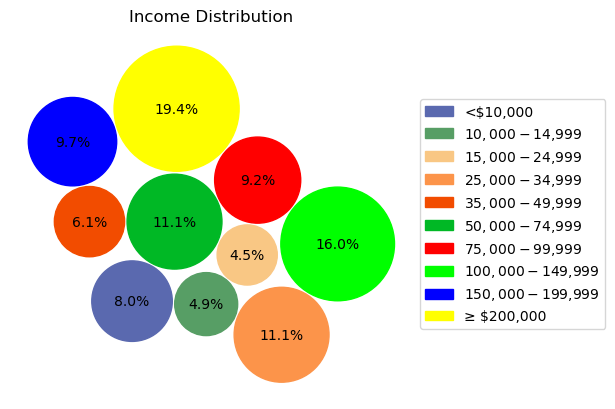

In [29]:
import matplotlib.pyplot as plt
import numpy as np

class BubbleChart:
    def __init__(self, income_means, bubble_spacing=0):
        """
        Setup for bubble collapse.

        Parameters
        ----------
        income_means : array-like
            Mean income values for different categories.
        bubble_spacing : float, default: 0
            Minimal spacing between bubbles after collapsing.
        """
        income_means = np.asarray(income_means)
        r = np.sqrt(income_means / np.pi)

        self.bubble_spacing = bubble_spacing
        self.bubbles = np.ones((len(income_means), 4))
        self.bubbles[:, 2] = r
        self.bubbles[:, 3] = income_means
        self.maxstep = 2 * self.bubbles[:, 2].max() + self.bubble_spacing
        self.step_dist = self.maxstep / 2

        # calculate initial grid layout for bubbles
        length = np.ceil(np.sqrt(len(self.bubbles)))
        grid = np.arange(length) * self.maxstep
        gx, gy = np.meshgrid(grid, grid)
        self.bubbles[:, 0] = gx.flatten()[:len(self.bubbles)]
        self.bubbles[:, 1] = gy.flatten()[:len(self.bubbles)]

        self.com = self.center_of_mass()

    def center_of_mass(self):
        return np.average(
            self.bubbles[:, :2], axis=0, weights=self.bubbles[:, 3]
        )

    def center_distance(self, bubble, bubbles):
        return np.hypot(bubble[0] - bubbles[:, 0],
                        bubble[1] - bubbles[:, 1])

    def outline_distance(self, bubble, bubbles):
        center_distance = self.center_distance(bubble, bubbles)
        return center_distance - bubble[2] - \
            bubbles[:, 2] - self.bubble_spacing

    def check_collisions(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return len(distance[distance < 0])

    def collides_with(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return np.argmin(distance, keepdims=True)

    def collapse(self, n_iterations=50):
        """
        Move bubbles to the center of mass.

        Parameters
        ----------
        n_iterations : int, default: 50
            Number of moves to perform.
        """
        for _ in range(n_iterations):
            moves = 0
            for i in range(len(self.bubbles)):
                rest_bub = np.delete(self.bubbles, i, 0)
                # try to move directly towards the center of mass
                # direction vector from bubble to the center of mass
                dir_vec = self.com - self.bubbles[i, :2]

                # shorten direction vector to have length of 1
                dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))

                # calculate new bubble position
                new_point = self.bubbles[i, :2] + dir_vec * self.step_dist
                new_bubble = np.append(new_point, self.bubbles[i, 2:4])

                # check whether new bubble collides with other bubbles
                if not self.check_collisions(new_bubble, rest_bub):
                    self.bubbles[i, :] = new_bubble
                    self.com = self.center_of_mass()
                    moves += 1
                else:
                    # try to move around a bubble that you collide with
                    # find colliding bubble
                    for colliding in self.collides_with(new_bubble, rest_bub):
                        # calculate direction vector
                        dir_vec = rest_bub[colliding, :2] - self.bubbles[i, :2]
                        dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                        # calculate orthogonal vector
                        orth = np.array([dir_vec[1], -dir_vec[0]])
                        # test which direction to go
                        new_point1 = (self.bubbles[i, :2] + orth *
                                      self.step_dist)
                        new_point2 = (self.bubbles[i, :2] - orth *
                                      self.step_dist)
                        dist1 = self.center_distance(
                            self.com, np.array([new_point1]))
                        dist2 = self.center_distance(
                            self.com, np.array([new_point2]))
                        new_point = new_point1 if dist1 < dist2 else new_point2
                        new_bubble = np.append(new_point, self.bubbles[i, 2:4])
                        if not self.check_collisions(new_bubble, rest_bub):
                            self.bubbles[i, :] = new_bubble
                            self.com = self.center_of_mass()

            if moves / len(self.bubbles) < 0.1:
                self.step_dist = self.step_dist / 2

    def plot(self, ax, labels, colors):
        for i in range(len(self.bubbles)):
            if i < len(labels) and i < len(colors):
                # Scale the radius to increase the bubble size
                radius = 1 * self.bubbles[i, 2]
                circ = plt.Circle(
                    self.bubbles[i, :2], radius, color=colors[i])
                ax.add_patch(circ)
                
    
                percentage = (self.bubbles[i, 3] / np.sum(self.bubbles[:, 3])) * 100
                ax.text(*self.bubbles[i, :2], f"{percentage:.1f}%",
                        horizontalalignment='center', verticalalignment='center')
        
        legend_labels = [f'{label}' for label in labels]
        ax.legend(legend_labels, loc='center left', bbox_to_anchor=(1, 0.5))

income_means = [first, second, third, fourth, fifth, sixth, seventh, eight, nine, ten]
labels = ['<$10,000', '$10,000-$14,999', '$15,000-$24,999', '$25,000-$34,999', '$35,000-$49,999', '$50,000-$74,999', '$75,000-$99,999', '$100,000-$149,999', '$150,000-$199,999', '≥ $200,000']
colors = ['#5A69AF', '#579E65', '#F9C784', '#FC944A', '#F24C00', '#00B825', '#FF0000', '#00FF00', '#0000FF', '#FFFF00']

bubble_chart = BubbleChart(income_means, bubble_spacing=0.1)
bubble_chart.collapse()
custom_colors = ['#5A69AF', '#579E65', '#F9C784', '#FC944A', '#F24C00', '#00B825', '#FF0000', '#00FF00', '#0000FF', '#FFFF00']


fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))
bubble_chart.plot(ax, labels, colors= custom_colors)
ax.axis("off")
ax.relim()
ax.autoscale_view()
ax.set_title('Income Distribution')

plt.show()

### ADD INSIGHTS HERE####

### CENSUS DATA 

In [30]:
census = pd.read_csv('census.csv')
air_data_clean = pd.read_csv('2021_data.csv')

In [31]:
#Merging DP03 and AQI on zipcodes.
census2 = air_data_clean.merge(census, left_on='zip_code', right_on='Zipcode', how='inner')

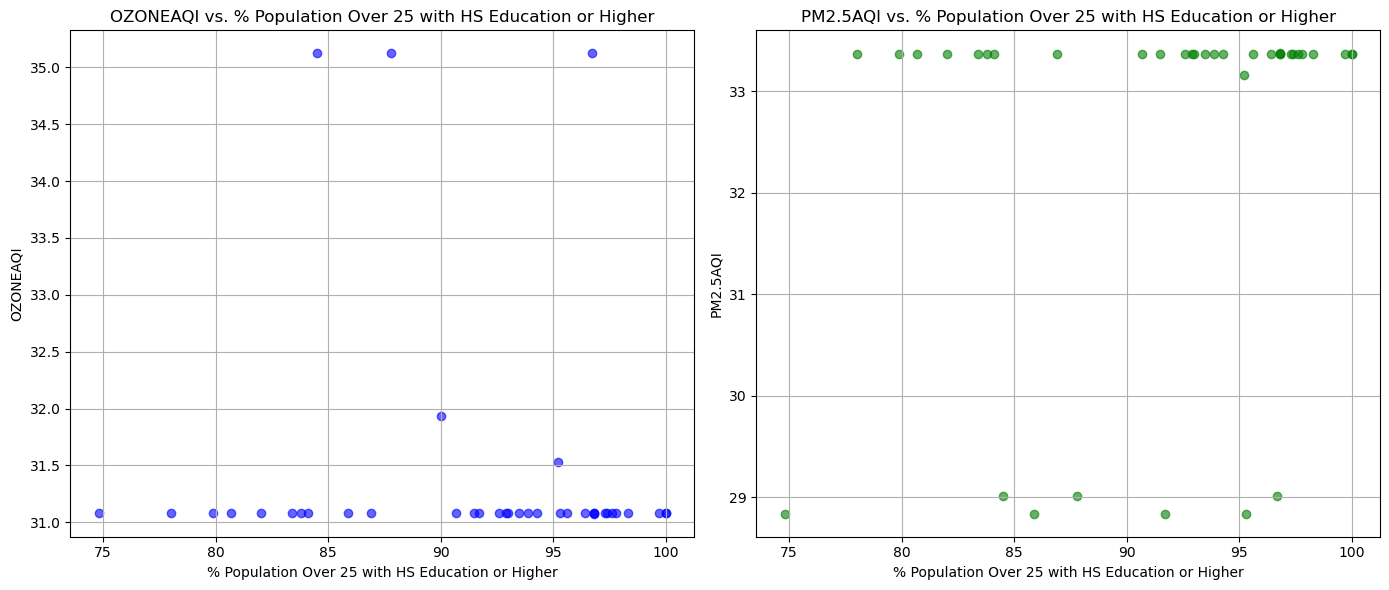

In [32]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(census2['Percent_Population_Over_25_Education_Attainment_High school graduate or higher'],
            census2['OZONEAQI'], color='blue', alpha=0.6)
plt.title('OZONEAQI vs. % Population Over 25 with HS Education or Higher')
plt.xlabel('% Population Over 25 with HS Education or Higher')
plt.ylabel('OZONEAQI')
plt.grid(True)

# Scatter plot for PM2.5AQI vs Percent_Population_Over_25_Education_Attainment_High school graduate or higher
plt.subplot(1, 2, 2)
plt.scatter(census2['Percent_Population_Over_25_Education_Attainment_High school graduate or higher'],
            census2['PM2.5AQI'], color='green', alpha=0.6)
plt.title('PM2.5AQI vs. % Population Over 25 with HS Education or Higher')
plt.xlabel('% Population Over 25 with HS Education or Higher')
plt.ylabel('PM2.5AQI')
plt.grid(True)

plt.tight_layout()
plt.show()

### ADD INSIGHT HERE

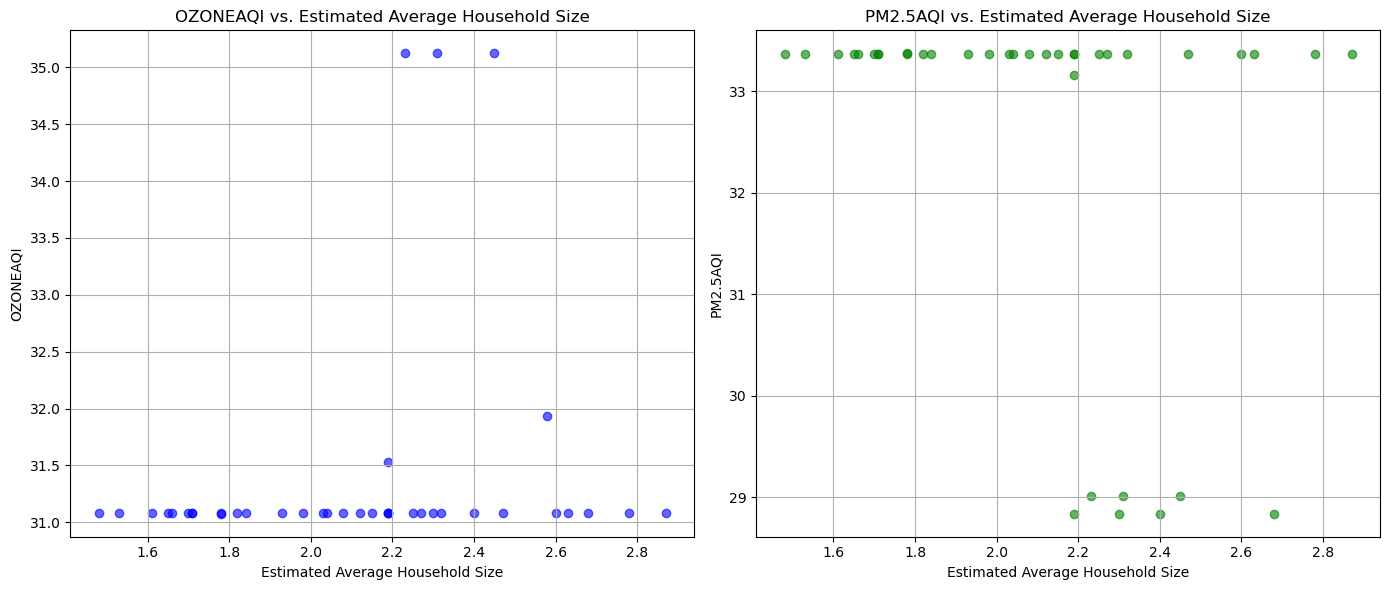

In [33]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(census2['Estimated_Average_Household_Size'], census2['OZONEAQI'], color='blue', alpha=0.6)
plt.title('OZONEAQI vs. Estimated Average Household Size')
plt.xlabel('Estimated Average Household Size')
plt.ylabel('OZONEAQI')
plt.grid(True)

# Scatter plot for PM2.5AQI vs Estimated_Average_Household_Size
plt.subplot(1, 2, 2)
plt.scatter(census2['Estimated_Average_Household_Size'], census2['PM2.5AQI'], color='green', alpha=0.6)
plt.title('PM2.5AQI vs. Estimated Average Household Size')
plt.xlabel('Estimated Average Household Size')
plt.ylabel('PM2.5AQI')
plt.grid(True)

plt.tight_layout()
plt.show()

### ADD INSIGHT HERE

In [34]:
census_transport_2 = air_data_clean.merge(census_transport, left_on='zip_code', right_on='Zipcode', how='inner')


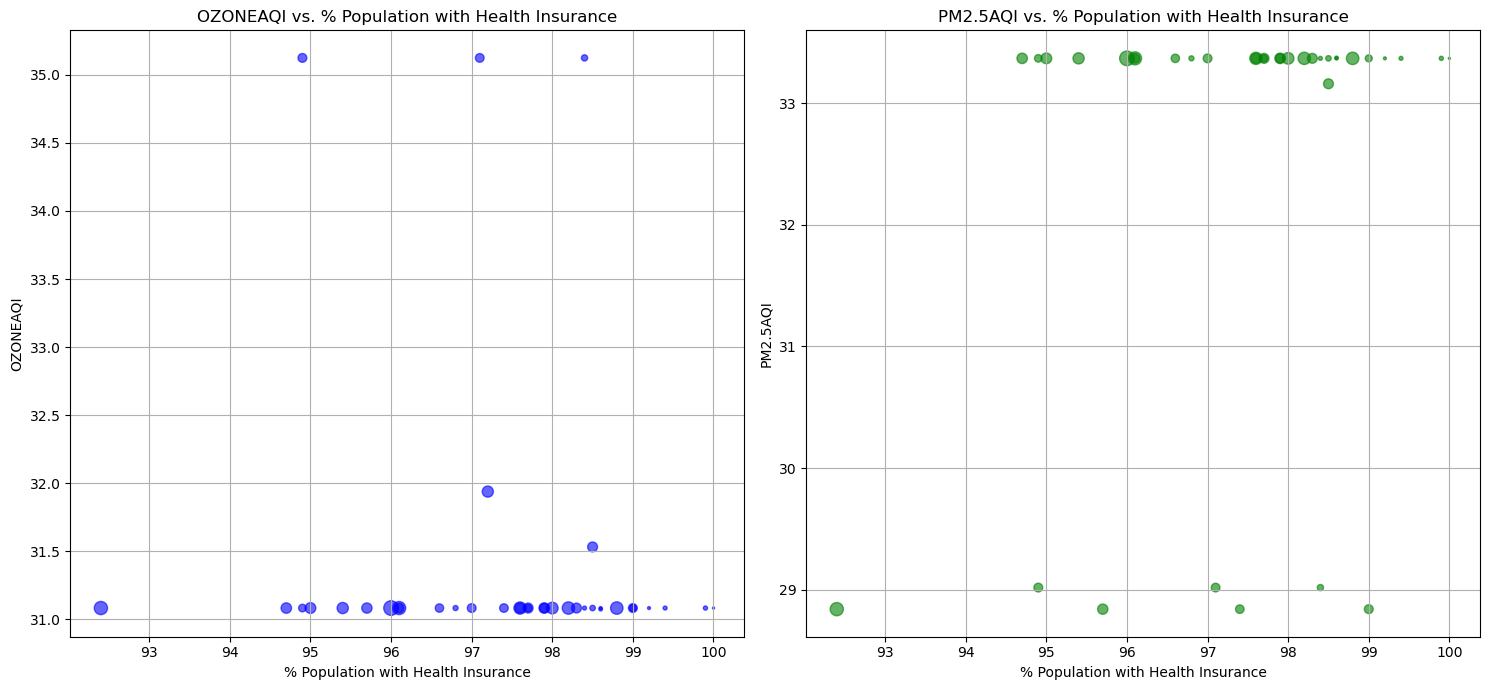

In [35]:
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.scatter(census_transport_2['Percent_Civilian_Noninstitutionalized_Population_with_Health_Coverage'],
            census_transport_2['OZONEAQI'], 
            s=census_transport_2['Estimated_Civilian_Noninstitutionalized_Population']/500, # scale size for better visualization
            color='blue', alpha=0.6)
plt.title('OZONEAQI vs. % Population with Health Insurance')
plt.xlabel('% Population with Health Insurance')
plt.ylabel('OZONEAQI')
plt.grid(True)

# Bubble plot for PM2.5AQI vs Percent with health insurance coverage
plt.subplot(1, 2, 2)
plt.scatter(census_transport_2['Percent_Civilian_Noninstitutionalized_Population_with_Health_Coverage'],
            census_transport_2['PM2.5AQI'], 
            s=census_transport_2['Estimated_Civilian_Noninstitutionalized_Population']/500, # scale size for better visualization
            color='green', alpha=0.6)
plt.title('PM2.5AQI vs. % Population with Health Insurance')
plt.xlabel('% Population with Health Insurance')
plt.ylabel('PM2.5AQI')
plt.grid(True)

plt.tight_layout()
plt.show()

### ADD INSIGHT HERE